In [14]:
"""
Created on Tue Mar 25 11:48:08 2025

@author: DavideDiMatteo
"""

'\nCreated on Tue Mar 25 11:48:08 2025\n\n@author: DavideDiMatteo\n'

In [1]:
import sys

import numpy as np # importa Numpy
import matplotlib.pyplot as plt # importa Matplotlib
import scipy.ndimage as ndi # importa Scipy per le immagini
import skimage.io as io # importa il modulo Input/Output di SK-Image
import scipy.ndimage as ndi
sys.path.append('../Librerie')  # Add the path to the custom library
import mylib as ml  # Import the custom library

#FILTRI DI SHARPENING
Obiettivo dei filtri di sharpening `e quello di evidenziare o enfatizzare i dettagli di un’immagine. A tal fine si
utilizzano operazioni che coinvolgono derivazioni del primo e secondo ordine in termini di differenze tra i valori
dei pixel di un’immagine. Provate il filtro laplaciano sull’immagine luna.jpg e visualizzate il risultato:

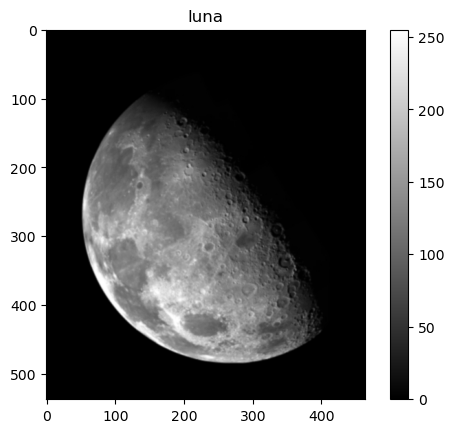

In [16]:
x = ml.leggiJpeg('../immagini/luna.jpg')
x = np.float64(x);
ml.showImage(x, 'luna')
plt.colorbar()

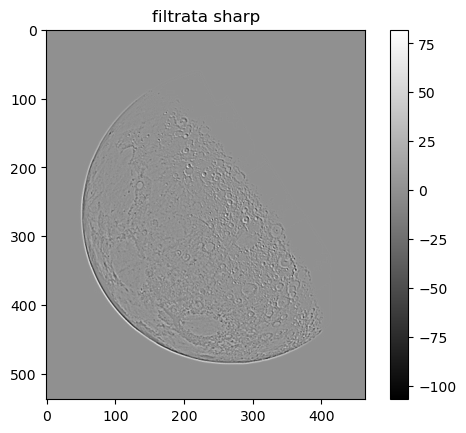

In [17]:
h = np.array ( [[0,1,0],[1,-4,1],[0,1,0]])
y = ndi.correlate(x,h);
ml.showImage(y, 'filtrata sharp')
plt.colorbar()

#se provo ad invertire i segni della maschera del filtro che succede?
h = np.array ( [[0,-1,0],[-1,4,-1],[0,-1,0]])
y = ndi.correlate(x,h);
ml.showImage(y, 'filtrata sharp invertita')
plt.colorbar()

#enfatizziamo dettagli dell'immagine originale sommando il laplaciano

#ASCOLTA NOTA ORE 11:57 nella registrazione

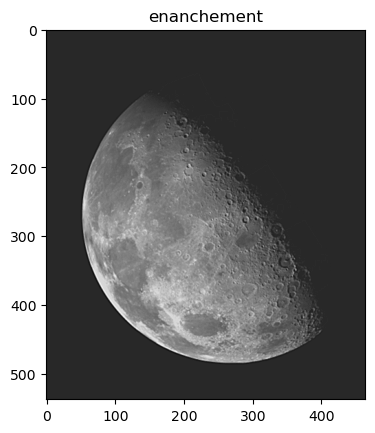

In [18]:
z= x - y
ml.showImage(z, 'enanchement')

In [19]:
plt.close('all')

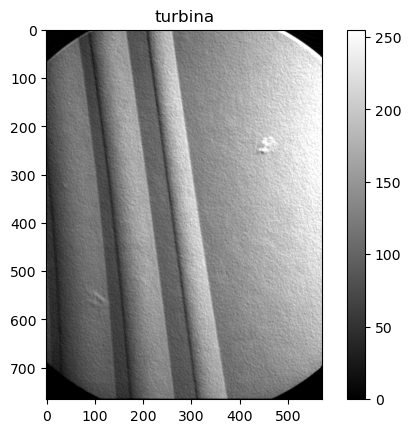

In [20]:
# #POINT e LINE DETECTION
x= ml.leggiJpeg('../immagini/turbina.jpg')
x = np.float64(x)
ml.showImage(x,'turbina')
plt.colorbar();

In [21]:
h = np.array([ [-1,-1,-1],[-1,8,-1],[-1,-1,-1]])
y = ndi.correlate(x,h);

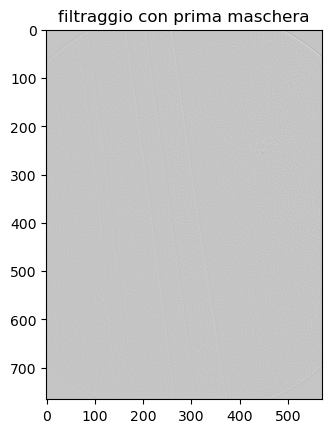

In [22]:
ml.showImage(y, 'filtraggio con prima maschera')

#vediamo che il range è molto frande e i valori tra 0 e  500 sono prevalenti, quindi non vedrò quelli a -2000
#per risolvere questo problema imposto una soglia di valori che mi limita l'intervallo di visualizzazione

In [23]:
z = np.abs(y)
th = 0.9*np.max(z)
mask = z>th

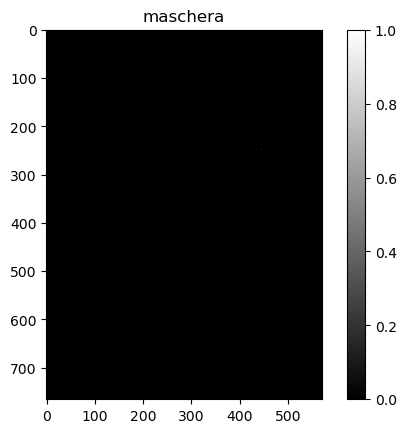

In [24]:
ml.showImage(mask, 'maschera')
plt.colorbar()

In [25]:
plt.close('all')

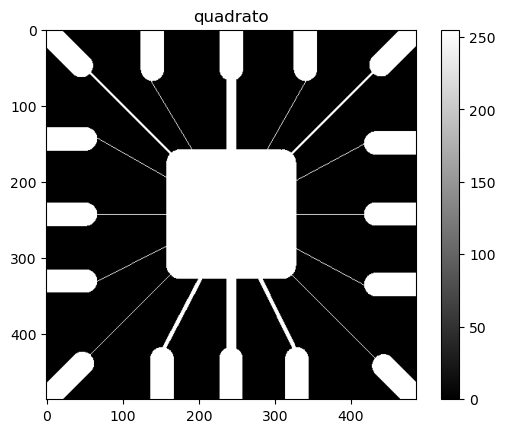

In [26]:
# #LINE DETECTION
#applico filtri all'immagine quadrato
x= ml.leggiJpeg('../immagini/quadrato.jpg')
x = np.float64(x)
ml.showImage(x,'quadrato')
plt.colorbar();

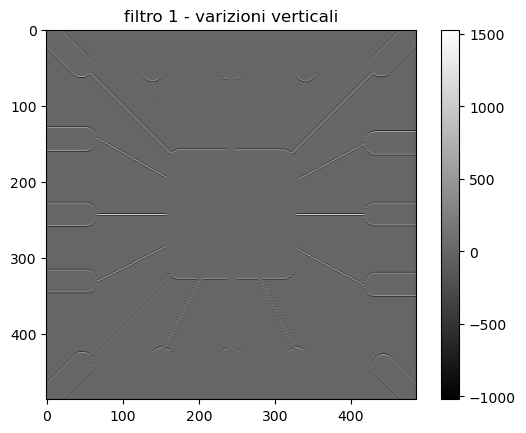

In [27]:
h1 = np.array([[-1,-1,-1],[2,2,2],[-1,-1,-1]])
y1 = ndi.correlate(x,h1)
ml.showImage(y1,'filtro 1 - varizioni verticali')
plt.colorbar();

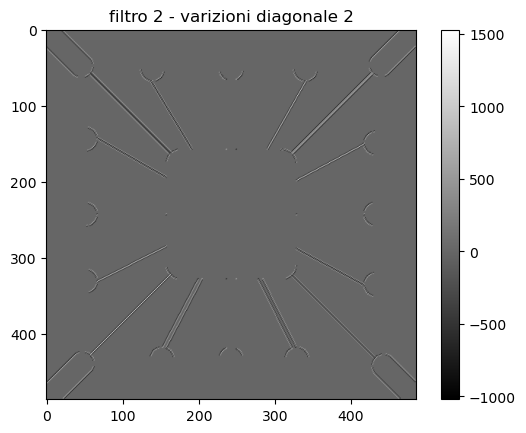

In [28]:
h2 = np.array([[-1,-1,2],[-1,2,-1],[2,-1,-1]])
y2 = ndi.correlate(x,h2)
ml.showImage(y2,'filtro 2 - varizioni diagonale 2')
plt.colorbar();

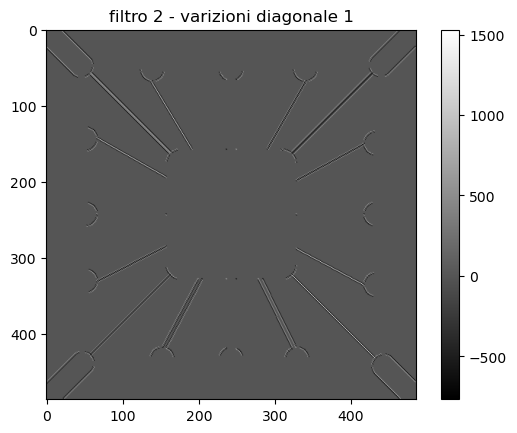

In [29]:
h3 = np.array([[2,-1,-1],[-1,2,-1],[-1,-1,2]])
y3 = ndi.correlate(x,h3)
ml.showImage(y3,'filtro 2 - varizioni diagonale 1')
plt.colorbar();

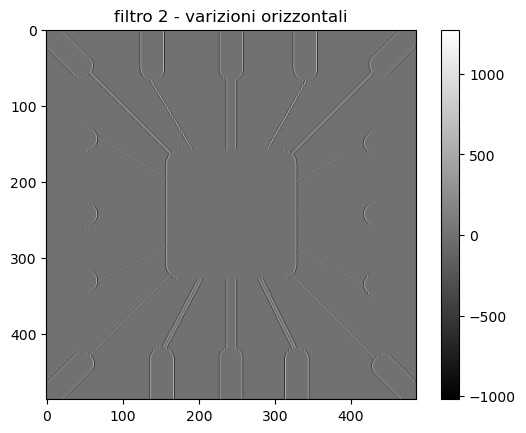

In [30]:
h4 = np.array([[-1,2,-1],[-1,2,-1],[-1,2,-1]])
y4 = ndi.correlate(x,h4)
ml.showImage(y4,'filtro 2 - varizioni orizzontali')
plt.colorbar();

#Quindi effettuate l’elaborazione che vi permette di
# produrre un’unica mappa in cui sono presenti linee di qualsiasi tipo nell’immagine. Fate attenzione alla scelta
# della soglia e al fatto che le maschere cos`ı definite vi permettono di rilevare bordi spessi un pixel.

In [31]:
# #voglio fare una nuova immagine che per ogni pixel prende il massimo fra le 4
z= np.stack((y1,y2,y3,y4), -1 ) #impilo lungo la terza direzione
z= np.max(z, -1);

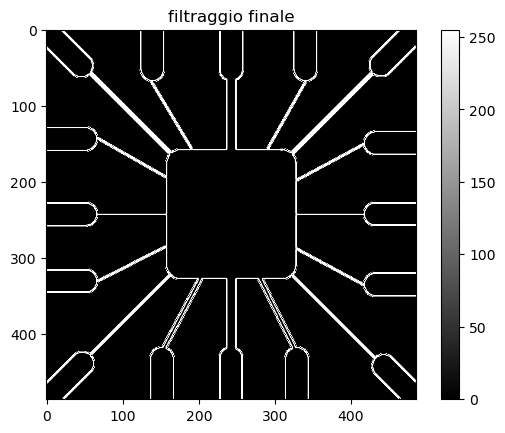

In [32]:
plt.imshow(z, clim=[0,255], cmap='gray')
plt.title ('filtraggio finale')
plt.colorbar();

In [33]:
plt.close('all')

In [34]:
# #FINIRE ESERCITAZIONE
# #2.2
# Realizzate l’edge detection dell’immagine house.y di dimensioni 512×512 usando le maschere di Sobel per il calcolo
# del gradiente e scegliendo il valore della soglia pari a T = 1.5*np.mean(grad). Visualizzate l’immagine
# originale, il gradiente e la mappa dei contorni.
x = np.fromfile('../immagini/house.y', np.uint8)
x = np.reshape(x, (512,512))

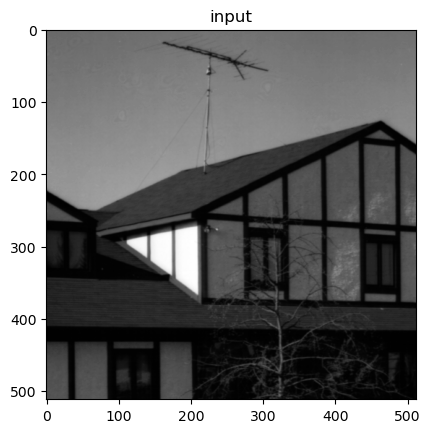

In [35]:
ml.showImage(x, 'input')

In [36]:
h = np.array( [[-1,-2,-1],[0,0,0],[1,2,1] ] ) #maschera di sobel
h = np.array( [[-2,-1,-0],[-1,0,1],[0,1,2] ] ) #maschera di sobel

In [37]:
y = ndi.correlate(x, h) #gradiente

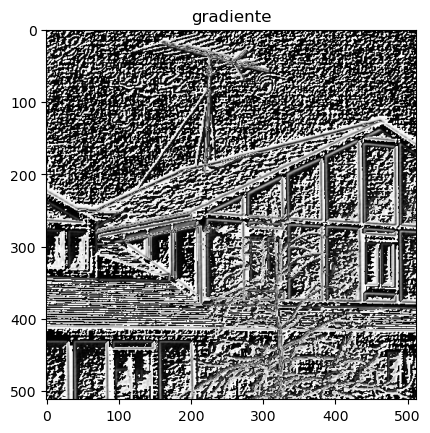

In [38]:
ml.showImage(y, 'gradiente')

In [39]:
soglia = 1.5*np.mean(y) 

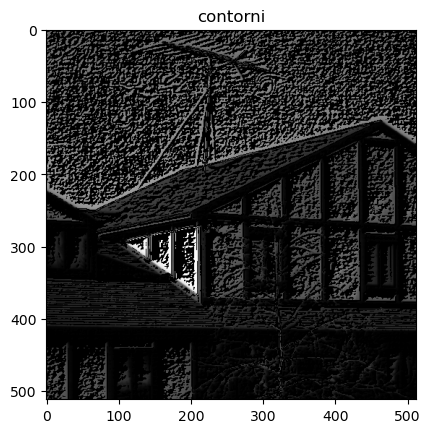

In [40]:
mask = y > soglia
x= mask*x
ml.showImage(x, 'contorni')

h2 = np.array( [[0,1],[-1,0] ] ) ##maschera di roberts

y = ndi.correlate(x, h2) #gradiente

ml.showImage(y, 'gradiente2')

soglia = 1.5*np.mean(y) 

mask = y > soglia
y= mask*y
ml.showImage(y, 'contorni')

In [41]:
plt.close('all')

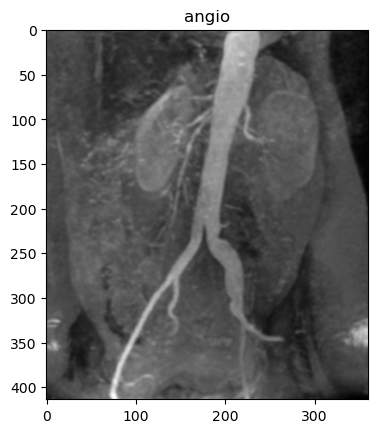

In [42]:
# #angiogramma
x= ml.leggiJpeg('../immagini/angiogramma.jpg')
ml.showImage(x, 'angio')

In [43]:
h = np.array( [[-1,-2,-1],[0,0,0],[1,2,1] ] ) #maschera di sobel

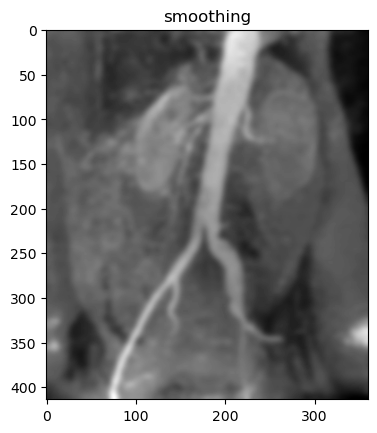

In [44]:
sigma = 3
y = ndi.gaussian_filter(x, (sigma,sigma))
#in alternativa filtra con media aritemtica
# y = ndi.generic_filter(x, np.mean, 10)
ml.showImage(y, 'smoothing')

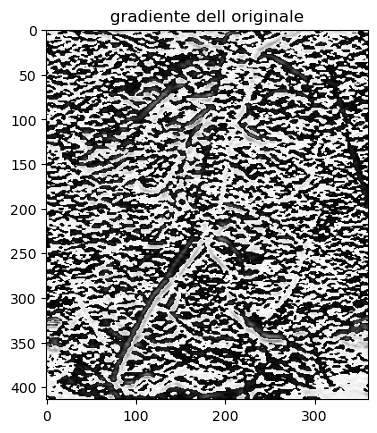

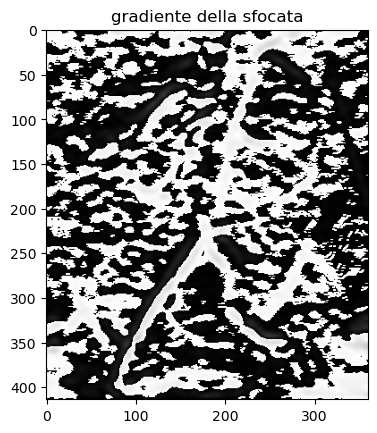

In [45]:
z1 = ndi.correlate(x, h) #gradiente
z2= ndi.correlate(y,h)
ml.showImage(z1, 'gradiente dell originale')
ml.showImage(z2, 'gradiente della sfocata')

In [46]:
#calcolo mappe dei controni
ths1 = 1.5*np.mean(z1)
ths2= 1.5*np.mean(z2)

In [47]:
mask1 = z1 > ths1
mask2 = z2 > ths2

In [48]:
x1 = x*mask1
x2= x*mask2

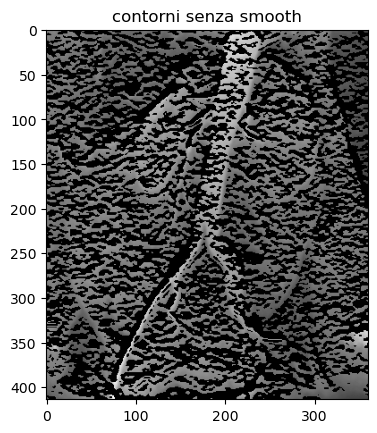

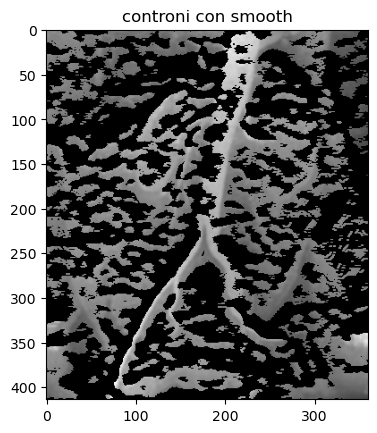

In [49]:
ml.showImage(x1, 'contorni senza smooth')
ml.showImage(x2, 'controni con smooth')

plt.close('all')
#laplaciano di una gaussiana
x = ml.leggiJpeg('../immagini/angio.16bit.png')
sigma=5
y = ndi.gaussian_laplace(x, (sigma,sigma))
ml.showImage(y, 'gauss-laplace')

from seg_utils import zero_crossing
z = zero_crossing(y)

ml.showImage(z, 'zero cross')